# Read and visualize with data in file
data/delannay-processed.csv


In [1]:
#Correction
%matplotlib inline
from pylab import *
import numpy as np
import pandas as pd
data= pd.read_csv("data/delannay-processed.csv",sep=",")
data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


# Do some visualisation

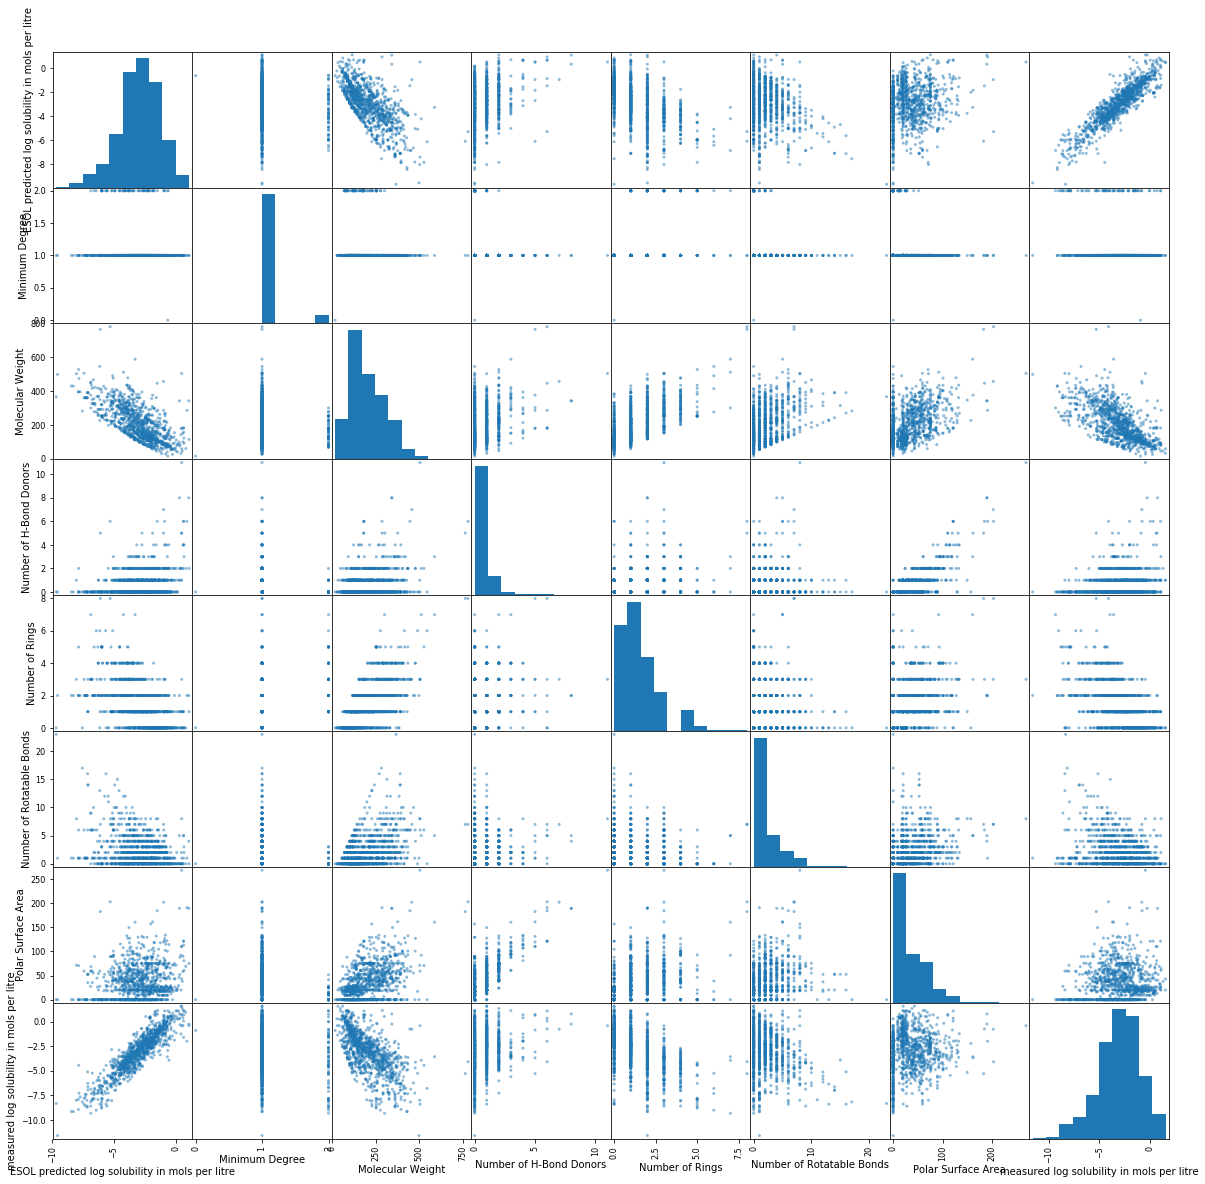

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));

# Do a linear regression

In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data[['Molecular Weight','Polar Surface Area']], data['measured log solubility in mols per litre'],
                                                    train_size=0.75, test_size=0.25)

reg = linear_model.LinearRegression()

fitted = reg.fit(X_train,y_train)

#Yprediction = fitted.predict(X)
#print(np.mean((Yprediction-Y)**2))
print("Score",reg.score(X_train,y_train))
print("Score",reg.score(X_test,y_test))

train_prediction = reg.predict(X_train)
test_prediction = reg.predict(X_test)

print("Mean absolute error",np.mean(np.abs(train_prediction-y_train)))
print("Mean absolute error",np.mean(np.abs(test_prediction-y_test)))


Score 0.6262855593673853
Score 0.6953196020568078
Mean absolute error 0.9838595995616833
Mean absolute error 0.966097474503736


(-11.121136958675345, 1.555604723546418, -12.259, 2.239)

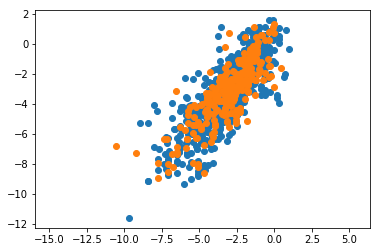

In [34]:
plot(train_prediction,y_train,"o")
plot(test_prediction,y_test,"o")
axis('equal')

In [42]:
# Add more features and see if it improves

In [36]:
from sklearn import linear_model

reg = linear_model.LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(data[['Molecular Weight','Polar Surface Area','Number of Rings','Number of Rotatable Bonds']], data['measured log solubility in mols per litre'],
                                                    train_size=0.75, test_size=0.25)

reg = linear_model.LinearRegression()

fitted = reg.fit(X_train,y_train)

#Yprediction = fitted.predict(X)
#print(np.mean((Yprediction-Y)**2))
print("Score",reg.score(X_train,y_train))
print("Score",reg.score(X_test,y_test))

train_prediction = reg.predict(X_train)
test_prediction = reg.predict(X_test)
print("Mean absolute error",np.mean(np.abs(train_prediction-y_train)))
print("Mean absolute error",np.mean(np.abs(test_prediction-y_test)))

Score 0.6883825493224414
Score 0.6592548049747391
Mean absolute error 0.9300566331789304
Mean absolute error 0.9237125210292838


# Automatic model selection

In [11]:
#conda install -c conda-forge ipywidgets
#jupyter nbextension enable --py widgetsnbextension

from tpot import TPOTRegressor
X_train, X_test, y_train, y_test = train_test_split(data[['Molecular Weight','Polar Surface Area','Number of Rings','Number of Rotatable Bonds']], data['measured log solubility in mols per litre'],
                                                    train_size=0.75, test_size=0.25)

pipeline_optimizer = TPOTRegressor(generations=10, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)

In [44]:
from sklearn.metrics import r2_score

train_prediction = pipeline_optimizer.predict(X_train)
test_prediction = pipeline_optimizer.predict(X_test)

print("Score",r2_score(y_train,train_prediction))
print("Score",r2_score(y_test,test_prediction))

print("Mean absolute error",np.mean(np.abs(train_prediction-y_train)))
print("Mean absolute error",np.mean(np.abs(test_prediction-y_test)))

Score 0.8954180389944957
Score 0.905728514138926
Mean absolute error 0.49690651952453685
Mean absolute error 0.450649748603794


(-8.555292394314899, 1.2272036830522723, -12.259, 2.239)

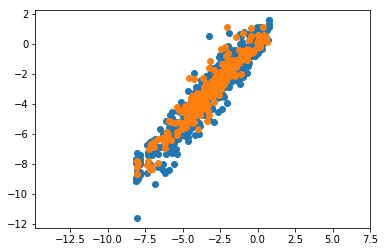

In [38]:
plot(train_prediction,y_train,"o")
plot(test_prediction,y_test,"o")
axis('equal')